In [274]:
#Libraries and Settings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.set_option('display.max_rows', None)

In [275]:
#Create dataframe
df = pd.read_csv('movies.csv')

In [276]:
#Overview of Data
df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [277]:
#Overview of Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [278]:
#Check for Missing Data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [279]:
#Drop Nulls
df = df.dropna()

In [280]:
#Re-Check for Missing Data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
print('\n')
df.info()

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), i

In [281]:
#Data Cleaning
  #Change column data type to preferred types, i.e. the following to decimals (as we don't need the decimals showing)
  #budget -> int
  #gross -> int
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [282]:
#Data Cleaning - Year
  #Notice that year differs from released-year.
  #We are interested in keeping the released-year, as it is correctly representing the release year of the movie.
df[['year','released']].head(50)

,year,released
0,1980,"June 13, 1980 (United States)"
1,1980,"July 2, 1980 (United States)"
2,1980,"June 20, 1980 (United States)"
3,1980,"July 2, 1980 (United States)"
4,1980,"July 25, 1980 (United States)"
5,1980,"May 9, 1980 (United States)"
6,1980,"June 20, 1980 (United States)"
7,1980,"December 19, 1980 (United States)"
8,1980,"June 19, 1981 (United States)"
9,1980,"May 16, 1980 (United States)"


In [283]:
#Appending a yearcorrect column, by parsing year info from 'released' column
df['yearcorrect'] = df['released'].astype(str).str.split().str[2]

In [284]:
#Convert the above yearcorrect into a int64 datatype
df['yearcorrect'] = pd.to_numeric(df['yearcorrect'], errors='coerce').fillna(0).astype(np.int64)

In [285]:
#Check to see if the above worked as intended
df[['yearcorrect','released']].head(50)

,yearcorrect,released
0,1980,"June 13, 1980 (United States)"
1,1980,"July 2, 1980 (United States)"
2,1980,"June 20, 1980 (United States)"
3,1980,"July 2, 1980 (United States)"
4,1980,"July 25, 1980 (United States)"
5,1980,"May 9, 1980 (United States)"
6,1980,"June 20, 1980 (United States)"
7,1980,"December 19, 1980 (United States)"
8,1981,"June 19, 1981 (United States)"
9,1980,"May 16, 1980 (United States)"


In [286]:
#For curiosity, see how many places in which year differs from the yearcorrect field (based on the 'released' field)
len(df[df['yearcorrect']!=df['year']])

716

In [310]:
#View highest grossing movies
df.sort_values(by=['gross'], inplace=False, ascending=False).head(50)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019


In [288]:
#Data Cleaning - Find Duplicates
len(df)

5421

In [289]:
#We have 5421 entries, uniquely identified by the name column
#Searching the name column to see if there are name duplicates
df.duplicated().value_counts()

False    5421
dtype: int64

In [290]:
#the duplicated() functions returns True for duplicates (not counting the first instance)
#because there are 0 reported values of True, we can conclude our data is free of duplicates!  Yay!

#Note that the year column is no longer needed, we already have yearcorrect, let's drop year column
df.drop('year', inplace=True, axis=1)

In [291]:
#EXPLORE DATA
#Create correlation matrix to view correlation between the numeric variables
df.corr()
#note that we are happy to use Pearson correlation (default when no arg specified), but kendall and spearman methods exist as well

,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.021325
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.050569
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.070251
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.055369
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.025931
yearcorrect,0.021325,0.050569,0.070251,0.055369,0.025931,1.000000


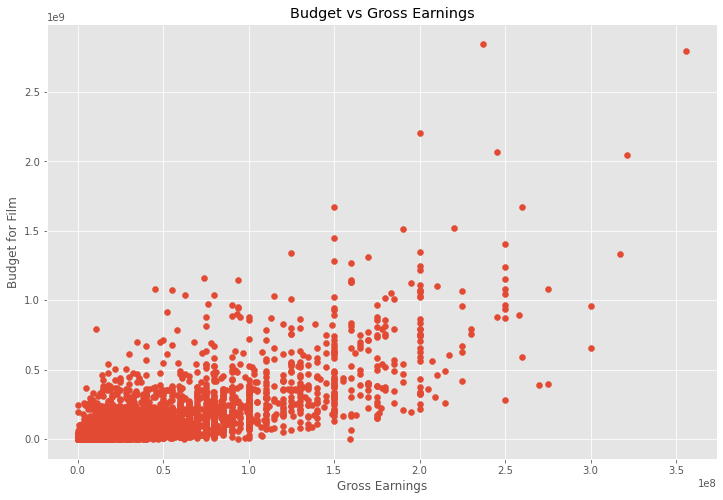

In [292]:
#Create scatterplot of budget vs gross - beginning of correlation analysis
#Using matplot
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

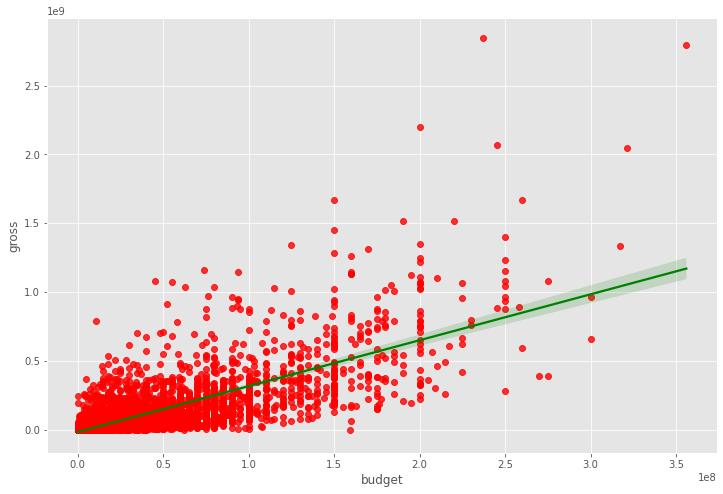

In [293]:
#Create scatterplot of budget vs gross - beginning of correlation analysis
#Using seaborn
sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"green"})

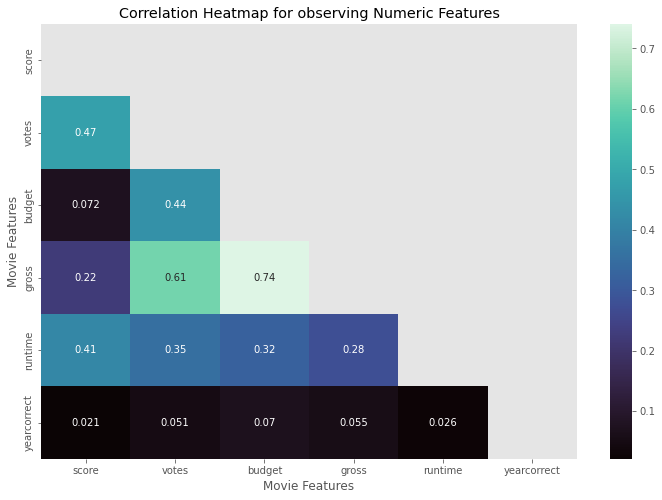

In [294]:
#create heatmap to visualize correlations
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='mako', annot=True)
plt.title('Correlation Heatmap for observing Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [296]:
#create loop to numerize the categorical columns in the dataframe, so further observations can be made
df_numerized = df.copy()
for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

#Check the results
display(df_numerized.head(10))
display(df.head(10))

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980
5,1509,6,9,1922,6.4,123000.0,1758,3081,155,47,550000,39754601,1108,95.0,1980
6,3930,6,0,1359,7.9,188000.0,974,576,860,47,27000000,115229890,1397,133.0,1980
7,3122,6,3,530,8.2,330000.0,1269,1257,1469,47,18000000,23402427,390,129.0,1980
8,3732,4,0,1346,6.8,101000.0,1606,1402,595,47,54000000,108185706,548,127.0,1981
9,4401,6,3,1755,7.0,10000.0,2011,280,402,47,10000000,15795189,1391,100.0,1980


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


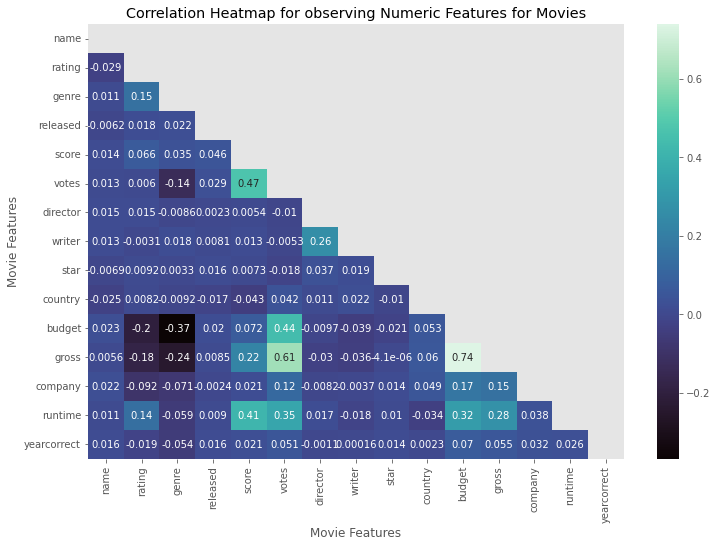

In [301]:
#create heatmap to visualize correlations
corr = df_numerized.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='mako', annot=True)
plt.title('Correlation Heatmap for observing Numeric Features for Movies')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [299]:
#view correlation matrix
df_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.015800
rating,-0.029234,1.000000,0.147796,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,-0.019109
genre,0.010996,0.147796,1.000000,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.054332
released,-0.006152,0.018083,0.022142,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,0.015787
score,0.014450,0.065983,0.035106,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.021325
votes,0.012615,0.006031,-0.135990,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.050569
director,0.015246,0.014656,-0.008553,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.001137
writer,0.012880,-0.003149,0.017578,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.000159
star,-0.006882,0.009196,0.003341,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,0.013677
country,-0.025490,0.008230,-0.009164,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,0.002298


In [300]:
#unstack the correlation matrix to view each piece of data easier on an individual level
corr = df_numerized.corr()
corr_pairs = corr.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.015800
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
 

In [302]:
#another way to view correlations, but now sorted
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
genre        company       -0.071334
company      genre         -0.071334
runtime      genre         -0.059237
genre        runtime       -0.059237
             yearcorrect   -0.054332
yearcorrect  genre         -0.054332
score        country       -0.043051
country      score         -0.043051
budget       writer        -0.039466
writer       budget        -0.039466
gross        writer        -0.035885
writer       gross         -0.035885
runtime      country       -0.034477
country      runtime       -0.034477
director     gross         -0.029560
g

In [308]:
#view 'high' correlation, anything above 0.5
#also removing correlations == 1, because those include the selfwise pairs
high_corr = sorted_pairs[((sorted_pairs) > 0.5) & ((sorted_pairs) != 1)]
high_corr

gross   votes     0.614751
votes   gross     0.614751
gross   budget    0.740247
budget  gross     0.740247
dtype: float64

In [ ]:
#in this data exploration, we can infer that gross and budget data have a high correlation to gross earnings